In [5]:
budget <- read.table("Budget.txt", header = TRUE, sep = ",", row.names = 1)

summary(budget)

      PVP             AGR             CMI              TRA        
 Min.   : 7.60   Min.   :0.300   Min.   : 0.100   Min.   : 4.500  
 1st Qu.:10.57   1st Qu.:0.800   1st Qu.: 0.400   1st Qu.: 6.675  
 Median :12.60   Median :1.400   Median : 1.300   Median : 8.000  
 Mean   :12.21   Mean   :1.996   Mean   : 3.942   Mean   : 8.321  
 3rd Qu.:13.43   3rd Qu.:2.650   3rd Qu.: 7.350   3rd Qu.: 9.150  
 Max.   :18.00   Max.   :6.000   Max.   :16.500   Max.   :15.300  
      LOG              EDU              ACS              ANC        
 Min.   : 0.500   Min.   : 2.100   Min.   : 0.500   Min.   : 0.000  
 1st Qu.: 0.675   1st Qu.: 7.325   1st Qu.: 1.800   1st Qu.: 0.000  
 Median : 1.850   Median : 8.700   Median : 4.550   Median : 3.800  
 Mean   : 3.958   Mean   : 9.942   Mean   : 4.817   Mean   : 4.275  
 3rd Qu.: 6.200   3rd Qu.:10.600   3rd Qu.: 6.800   3rd Qu.: 5.450  
 Max.   :15.800   Max.   :23.800   Max.   :11.300   Max.   :13.400  
      DEF             DET             DIV       

In [7]:
library(FactoMineR)

In [11]:
budget_acp <- PCA(budget, scale.unit = TRUE)

summary(budget_acp)


Call:
PCA(X = budget, scale.unit = TRUE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               4.972   2.051   1.290   0.993   0.708   0.558   0.204
% of var.             45.203  18.642  11.729   9.028   6.440   5.074   1.857
Cumulative % of var.  45.203  63.845  75.574  84.602  91.042  96.116  97.973
                       Dim.8   Dim.9  Dim.10  Dim.11
Variance               0.125   0.063   0.035   0.000
% of var.              1.138   0.571   0.318   0.000
Cumulative % of var.  99.111  99.682 100.000 100.000

Individuals (the 10 first)
         Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr
1872 |  4.253 | -2.900  7.049  0.465 |  1.024  2.132  0.058 |  1.564  7.902
1880 |  4.121 | -2.767  6.416  0.451 |  2.012  8.226  0.238 | -0.169  0.092
1890 |  2.727 | -2.416  4.893  0.785 |  0.224  0.102  0.007 |  0.765  1.892
1900 |  2.645 | -2.057  3.545  0.605 |  0.755  1.158  0.081 |  1.007  3.276
1903 |  3.090 |

In [15]:
eig <- budget_acp$eig

eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,4.972362e+00,4.520329e+01,45.20329
comp 2,2.050638e+00,1.864217e+01,63.84546
comp 3,1.290168e+00,1.172880e+01,75.57426
comp 4,9.930553e-01,9.027775e+00,84.60203
comp 5,7.083544e-01,6.439585e+00,91.04162
comp 6,5.581499e-01,5.074090e+00,96.11571
comp 7,2.042530e-01,1.856845e+00,97.97255
comp 8,1.252021e-01,1.138201e+00,99.11075
comp 9,6.281176e-02,5.710160e-01,99.68177
comp 10,3.500069e-02,3.181881e-01,99.99996


In [16]:
eig_cumsum <- cumsum(eig[, 2])  # Soma acumulada da variância explicada

# Identificar o número mínimo de eixos que capturam pelo menos 70% da variância
num_axes <- which(eig_cumsum >= 70)[1]

# Exibir o resultado
list(
  Variancia_Explicada = eig[, 2],
  Variancia_Acumulada = eig_cumsum,
  Eixos_Selecionados = num_axes
)

$Variancia_Explicada
      comp 1       comp 2       comp 3       comp 4       comp 5       comp 6 
4.520329e+01 1.864217e+01 1.172880e+01 9.027775e+00 6.439585e+00 5.074090e+00 
      comp 7       comp 8       comp 9      comp 10      comp 11 
1.856845e+00 1.138201e+00 5.710160e-01 3.181881e-01 4.092768e-05 

$Variancia_Acumulada
   comp 1    comp 2    comp 3    comp 4    comp 5    comp 6    comp 7    comp 8 
 45.20329  63.84546  75.57426  84.60203  91.04162  96.11571  97.97255  99.11075 
   comp 9   comp 10   comp 11 
 99.68177  99.99996 100.00000 

$Eixos_Selecionados
comp 3 
     3

In [18]:
budget_acp$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
PVP,0.6040060,26.686053774,9.055070,1.153524,16.35401050
AGR,13.4708947,0.001452146,10.421958,2.373315,0.15196544
CMI,13.9570659,5.678822239,1.553527,6.670711,3.23073133
TRA,0.3772386,19.401707169,10.937781,7.958154,42.21254775
LOG,10.4731694,7.714430711,11.484003,4.338422,9.73016415
EDU,12.4490430,0.914639027,13.988056,1.341157,14.23656188
ACS,17.5152669,0.495892444,2.145479,2.277522,1.53248450
ANC,1.6788062,31.783063684,10.903019,4.123934,0.02007111
DEF,7.5375205,2.282338278,5.220911,40.888426,3.36493518
DET,15.8901574,4.428316253,1.993052,3.236166,4.37339515


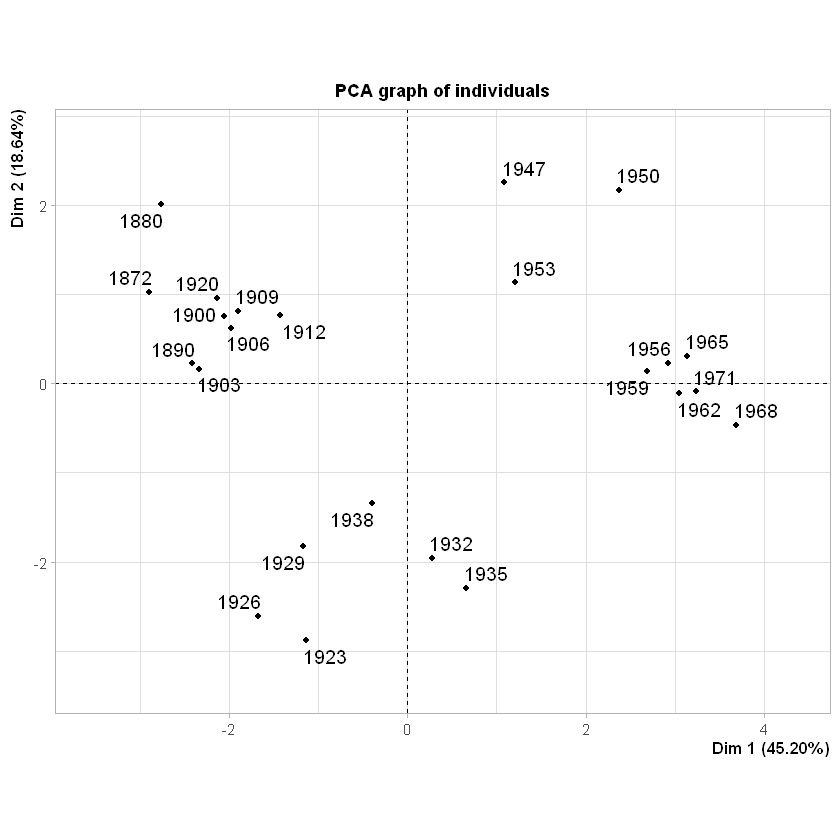

In [20]:
plot(budget_acp)

In [19]:
budget_acp$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
PVP,0.03003336,5.472344e-01,0.11682564,0.01145513,0.1158443459
AGR,0.66982163,2.977826e-05,0.13446079,0.02356833,0.0010764538
CMI,0.69399582,1.164521e-01,0.02004312,0.06624385,0.0228850261
TRA,0.01875767,3.978588e-01,0.14111577,0.07902887,0.2990144212
LOG,0.52076388,1.581951e-01,0.14816295,0.04308293,0.0689240417
EDU,0.61901147,1.875594e-02,0.18046945,0.01331843,0.1008453064
ACS,0.87092246,1.016896e-02,0.02768028,0.02261705,0.0108554207
ANC,0.08347632,6.517557e-01,0.14066729,0.04095294,0.0001421746
DEF,0.37479279,4.680250e-02,0.06735854,0.40604468,0.0238356650
DET,0.79011613,9.080875e-02,0.02571372,0.03213692,0.0309791351


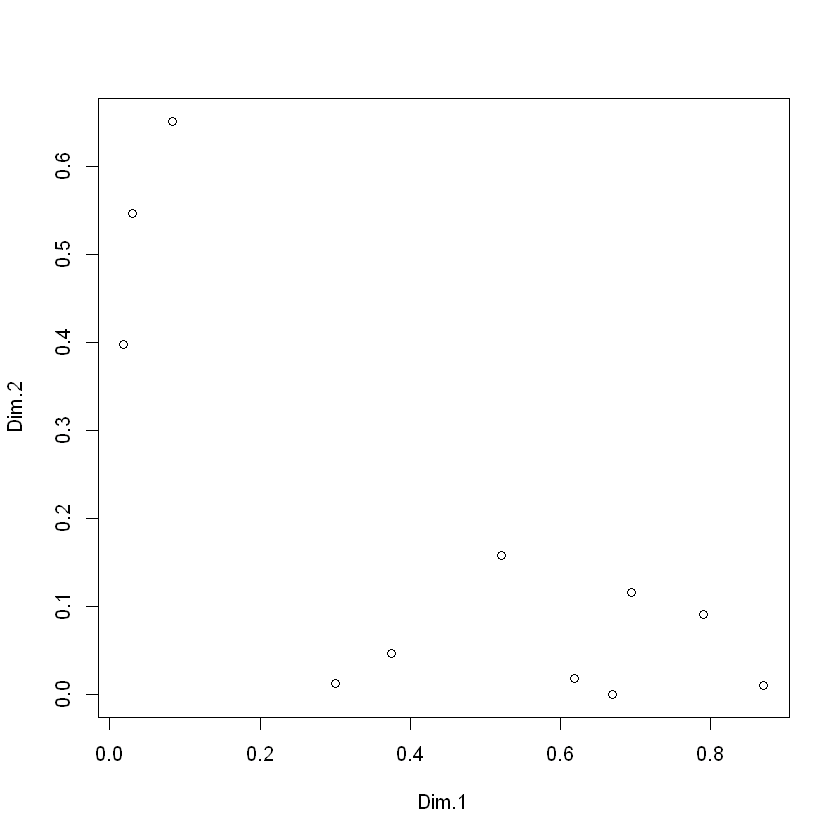

In [21]:
plot(budget_acp$var$cos2)


Call:
hclust(d = distancia, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 24 


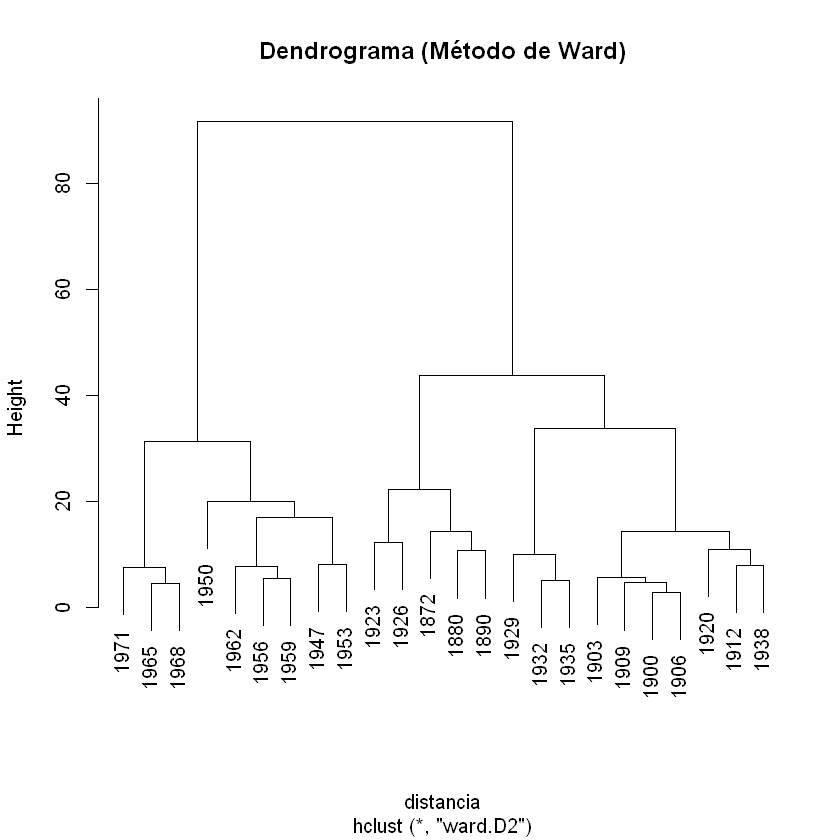

In [26]:
distancia <- dist(budget)

# Classificação hierárquica usando o método de Ward
hclust_res <- hclust(distancia, method = "ward.D2")

hclust_res
plot(hclust_res, main = "Dendrograma (Método de Ward)")


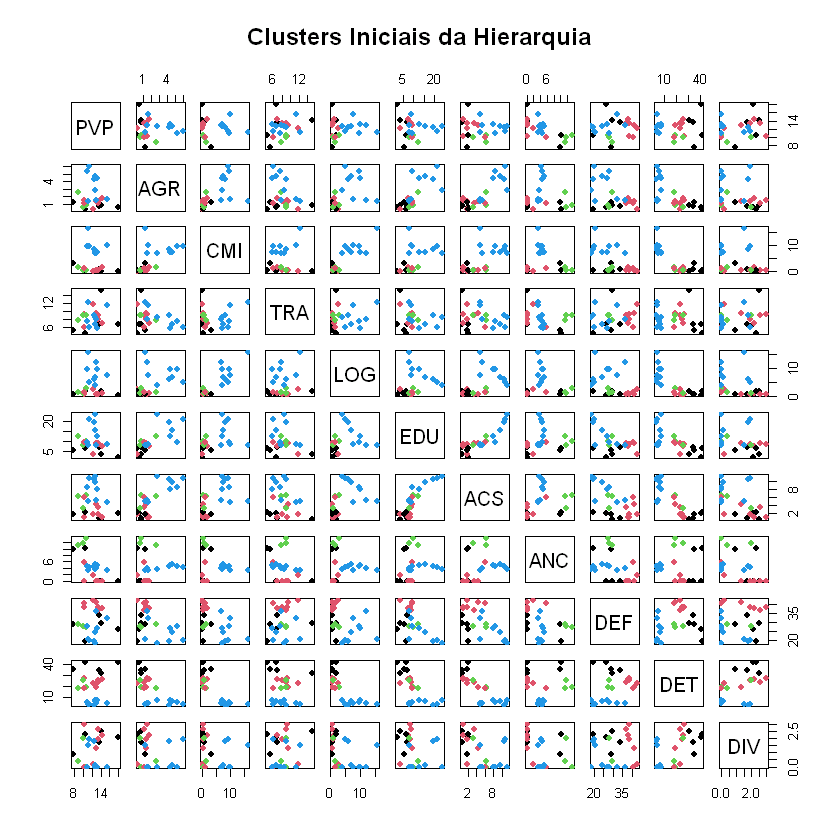

In [ ]:
# Cortar o dendrograma para obter 3 clusters
clusters_iniciais <- cutree(hclust_res, k = 4)


In [37]:
print(data.frame(Individuo = rownames(budget), Classe = clusters_iniciais))

     Individuo Classe
1872      1872      1
1880      1880      1
1890      1890      1
1900      1900      2
1903      1903      2
1906      1906      2
1909      1909      2
1912      1912      2
1920      1920      2
1923      1923      1
1926      1926      1
1929      1929      3
1932      1932      3
1935      1935      3
1938      1938      2
1947      1947      4
1950      1950      4
1953      1953      4
1956      1956      4
1959      1959      4
1962      1962      4
1965      1965      4
1968      1968      4
1971      1971      4


In [41]:
aggregate(DEF ~ clusters_iniciais, data = budget, mean)

clusters_iniciais,DEF
<int>,<dbl>
1,27.78000
2,39.37143
3,28.23333
4,25.22222
